---
title: "Coordinate Reference Systems (purple martins)"
author: "Jungwoo Lee"
date: "2023-05-19"
categories: [code, python]
image: iucn.png
---


> Coordinate Reference System Exercise, Kaggle

# Introduction
귀하는 조류 보호 전문가이며 purple martins의 이동 패턴을 이해하고 싶어합니다. 당신의 연구에서 당신은 이 새들이 일반적으로 미국 동부에서 여름 번식기를 보낸 다음 겨울 동안 남미로 이동한다는 사실을 발견했습니다. 하지만 이 새는 멸종 위기에 처해 있으므로 이 새들이 방문할 가능성이 더 높은 위치를 자세히 살펴보고자 합니다.

<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/qQcS0KM.png" width="1000"><br/>
</center>


남미에는 여러 [보호 구역](https://www.iucn.org/theme/protected-areas/about)이 있으며 그곳으로 이동(또는 거주)하는 종들이 번성할 수 있는 최상의 기회를 갖도록 특별 규정에 따라 운영됩니다. purple martins이 이 지역을 방문하는 경향이 있는지 알고 싶습니다. 이 질문에 답하기 위해 11가지 새의 연중 위치를 추적하는 최근 수집된 데이터를 사용합니다.

시작하기 전에 아래 코드 셀을 실행하여 모든 것을 설정하십시오.

# Reading package

In [2]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

# from learntools.core import binder
# binder.bind(globals())
# from learntools.geospatial.ex2 import *

# Exercises

### 1) Load the data.

다음 코드 셀(변경 사항 없음)을 실행하여 GPS 데이터를 pandas DataFrame `birds_df`로 로드합니다.

In [3]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv("/Users/jungwoolee/Desktop/college/data mining/geo_data/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


데이터 세트에는 11마리의 새가 있으며 각 새는 "tag-local-identifier" 열의 고유한 값으로 식별됩니다. 각 새는 일년 중 서로 다른 시간에 수집된 몇 가지 측정값을 가지고 있습니다.

다음 코드 셀을 사용하여 GeoDataFrame 'birds'를 만듭니다.
- `birds`에는 (경도, 위도) 위치가 있는 Point 객체를 포함하는 "도형" 열과 함께 `birds_df`의 모든 열이 있어야 합니다.
- `birds`의 CRS를 `{'init': 'epsg:4326'}`로 설정합니다.

In [4]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))

birds.crs = {'init' :'epsg:4326'}

/Users/jungwoolee/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### 2) Plot the data.

다음으로 GeoPandas의 `naturalearth_lowres` 데이터세트를 로드하고 아메리카(북미와 남미 모두)에 있는 모든 국가의 경계를 포함하는 GeoDataFrame으로 아메리카를 설정합니다. 변경 없이 다음 코드 셀을 실행합니다.


In [5]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


다음 코드 셀을 사용하여 (1) `미국` GeoDataFrame의 국가 경계와 (2) `birds_gdf` GeoDataFrame의 모든 지점을 모두 표시하는 단일 플롯을 만듭니다.

여기서 특별한 스타일에 대해 걱정하지 마십시오. 모든 데이터가 제대로 로드되었는지 빠른 온전성 검사로 예비 플롯을 만드십시오. 특히, 새를 구별하기 위해 포인트를 색상으로 구분할 필요가 없으며, 시작점과 끝점을 구별할 필요가 없습니다. 우리는 연습의 다음 부분에서 그것을 할 것입니다.

<AxesSubplot:>

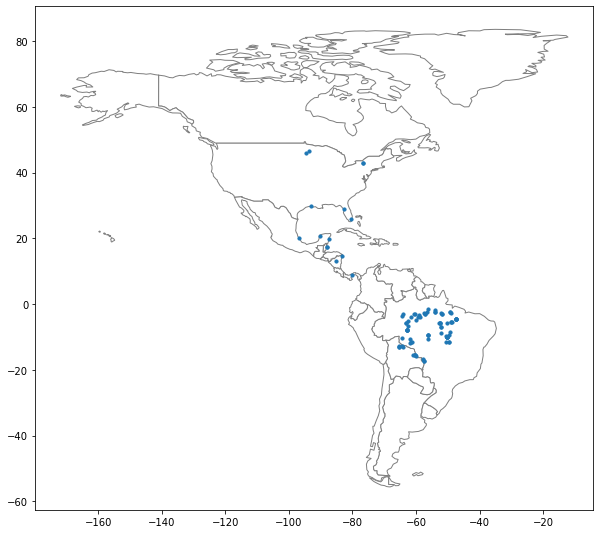

In [6]:
ax = americas.plot(figsize = (10,10), color = 'white', linestyle = '-', edgecolor = 'gray')
birds.plot(ax = ax, markersize = 10)

### 3) Where does each bird start and end its journey? (Part 1)

이제 각 새의 이동 경로를 자세히 살펴볼 준비가 되었습니다. 다음 코드 셀을 실행하여 두 개의 GeoDataFrame을 만듭니다.
- `path_gdf`에는 각 새의 경로를 표시하는 LineString 개체가 포함되어 있습니다. 'LineString()' 메서드를 사용하여 Point 개체 목록에서 LineString 개체를 만듭니다.

- `start_gdf`는 각 새의 시작점을 포함합니다.

In [7]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry = path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry = start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

/Users/jungwoolee/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/jungwoolee/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


다음 코드 셀을 사용하여 각 새의 최종 위치를 포함하는 GeoDataFrame `end_gdf`를 생성합니다.

- 형식은 두 개의 열("tag-local-identifier" 및 "geometry")이 있는 `start_gdf`의 형식과 동일해야 합니다. 여기서 "geometry" 열에는 Point 객체가 포함됩니다.
- `end_gdf`의 CRS를 `{'init': 'epsg:4326'}`로 설정합니다.

In [8]:
end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry = end_df.geometry)
end_gdf.crs = {'init' :'epsg:4326'}

/Users/jungwoolee/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### 4) Where does each bird start and end its journey? (Part 2)

위 질문의 GeoDataFrames(`path_gdf`, `start_gdf` 및 `end_gdf`)를 사용하여 단일 지도에서 모든 새의 경로를 시각화합니다.   
`americas` GeoDataFrame을 사용할 수도 있습니다.


<AxesSubplot:>

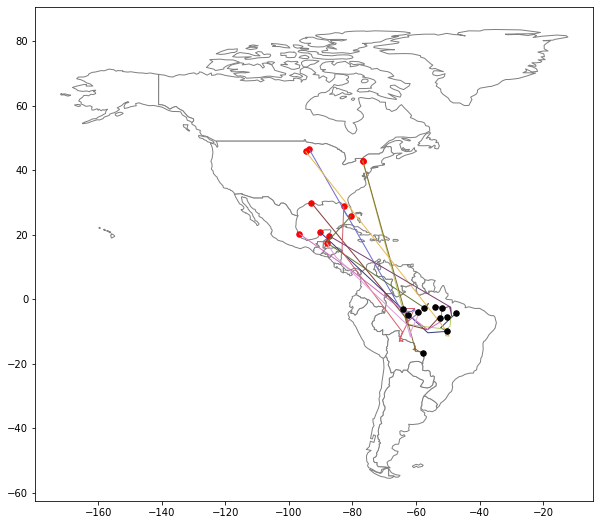

In [11]:
ax = americas.plot(figsize = (10, 10), color = 'white', linestyle = '-', edgecolor = 'gray')

start_gdf.plot(ax = ax, color = 'red',  markersize = 30)
path_gdf.plot(ax = ax, cmap = 'tab20b', linestyle = '-', linewidth = 1, zorder = 1)
end_gdf.plot(ax = ax, color = 'black', markersize = 30)


### 5) Where are the protected areas in South America? (Part 1)

모든 새들이 남미 어딘가에 도착하는 것처럼 보입니다. 그러나 그들은 보호 지역으로 가고 있습니까?

다음 코드 셀에서는 남미의 모든 보호 지역 위치를 포함하는 GeoDataFrame `protected_areas`를 생성합니다. 해당 shapefile은 파일 경로 `protected_filepath`에 있습니다.


In [11]:
# Path of the shapefile to load
protected_filepath = "/Users/jungwoolee/Desktop/college/data mining/geo_data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"

# Your code here
protected_areas = gpd.read_file(protected_filepath)


### 6) Where are the protected areas in South America? (Part 2)

`protected_areas` GeoDataFrame을 사용하여 남아메리카의 보호 지역 위치를 표시하는 플롯을 만듭니다. (_일부 보호 지역은 육지에 있고 다른 지역은 바다에 있음을 알 수 있습니다._)

<AxesSubplot:>

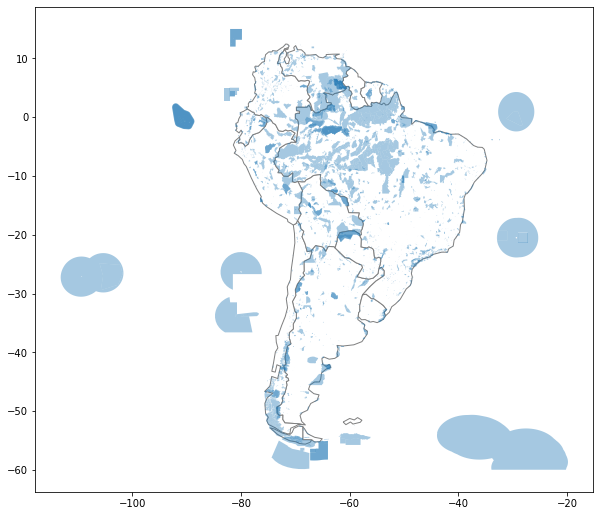

In [12]:
# Country boundaries in South America
south_america = americas.loc[americas['continent'] == 'South America']

# Your code here: plot protected areas in South America
ax = south_america.plot(figsize = (10, 10), color = 'white', edgecolor = 'gray')
protected_areas.plot(ax = ax, alpha = 0.4)

### 7) What percentage of South America is protected?

남미의 몇 퍼센트가 새들에게 적합한지 알기 위해 보호되는 남미의 비율을 결정하는 데 관심이 있습니다.

첫 번째 단계로 남미의 모든 보호 토지(해양 지역 제외)의 총 면적을 계산합니다. 이를 위해 총 면적과 총 해양 면적을 각각 평방 킬로미터 단위로 포함하는 "REP_AREA" 및 "REP_M_AREA" 열을 사용합니다.

변경 없이 아래 코드 셀을 실행합니다.

In [13]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


그런 다음 계산을 완료하기 위해 `south_america` GeoDataFrame을 사용합니다.

In [14]:
south_america.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


다음 단계에 따라 남아메리카의 전체 면적을 계산합니다.
- 각 다각형(CRS는 EPSG 3035)의 `area` 속성을 사용하여 각 국가의 면적을 계산하고 결과를 더합니다. 계산된 면적은 평방 미터 단위입니다.
- 답을 평방 킬로미터 단위로 변환하십시오.

In [15]:
totalArea = sum(south_america.geometry.to_crs(epsg = 3035).area) / 10 ** 6

아래 코드 셀을 실행하여 보호되는 남미의 비율을 계산합니다.

In [16]:
# What percentage of South America is protected?
percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected * 100, 2)))

Approximately 30.39% of South America is protected.


### 8) Where are the birds in South America?

그렇다면 새들은 보호 구역에 있습니까?

남미에서 새가 발견된 모든 위치를 모든 새에 대해 표시하는 플롯을 만듭니다. 또한 남미의 모든 보호 지역 위치를 플로팅합니다.

(토지 구성 요소가 없는) 순수 해양 지역인 보호 지역을 제외하려면 "MARINE" 열을 사용할 수 있습니다(그리고 대신 `protected_areas[protected_areas['MARINE']!='2']`의 행만 표시) `protected_areas` GeoDataFrame의 모든 행).

<AxesSubplot:>

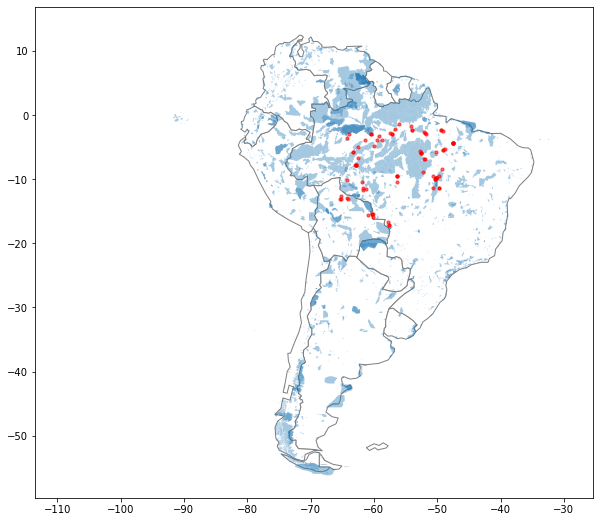

In [17]:
ax = south_america.plot(figsize = (10, 10), color = 'white', edgecolor = 'gray')
protected_areas[protected_areas['MARINE'] != '2'].plot(ax = ax, alpha = 0.4, zorder = 1)
birds[birds.geometry.y < 0].plot(ax = ax, color = 'red', alpha = 0.6, markersize = 10, zorder = 2)